In [6]:
import re
import string
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

**Carrega as bases de treino e teste**

In [7]:
baseTreino = pd.read_csv('train/ReutersGrain-train.csv', sep=';', encoding='utf-8')
baseTeste = pd.read_csv('test/ReutersGrain-test.csv', sep=';', encoding='utf-8')

**Baixa os recursos do NLTK**

In [8]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Inicializa o steemer**

In [9]:
stemmer = PorterStemmer()

**Pré processamento do texto**

In [10]:
def preprocess(text):
    
    #Tokenização
    tokens = word_tokenize(text.lower())
    
    #Remoção de stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    #Stemming
    tokens = [stemmer.stem(token) for token in tokens]
    
    #Reune os tokens em uma string
    processed_text = ' '.join(tokens)
    
    return processed_text

In [11]:
baseTreino['processed_text'] = baseTreino['Text'].apply(preprocess)

In [12]:
baseTreino

,Text,class-att,processed_text
0,'BAHIA COCOA REVIEW Showers continued througho...,0,bahia cocoa review shower continu throughout w...
1,'NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESE...,1,nation averag price farmerown reserv us agricu...
2,'ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS...,1,argentin grainoilse registr argentin grain boa...
3,'CHAMPION PRODUCTS &lt.CH> APPROVES STOCK SPLI...,0,champion product ltch approv stock split champ...
4,'COMPUTER TERMINAL SYSTEMS &lt.CPML> COMPLETES...,0,comput termin system ltcpml complet sale compu...
...,...,...,...
1549,'METEX CORP &lt.MTX> 4TH QTR DEC 28 Shr 22 cts...,0,metex corp ltmtx th qtr dec shr ct vs ctsn net...
1550,'HOUSTON OIL TRUST &lt.HO> OMITS MARCH DISTRIB...,0,houston oil trust ltho omit march distribut ho...
1551,'MONOCLONAL ANTIBODIES &lt.MABS> BUYS COMPANY ...,0,monoclon antibodi ltmab buy compani monoclon a...
1552,'U.S. TREASURY PROPOSES SOME S. AFRICAN IMPORT...,0,us treasuri propos african import treasuri pro...


In [13]:
baseTeste['processed_text'] = baseTeste['Text'].apply(preprocess)

In [14]:
baseTeste

,Text,class-att,processed_text
0,'ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN R...,0,asian export fear damag usjapan rift mount tra...
1,'CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN ST...,1,china daili say vermin eat pct grain stock sur...
2,'JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNW...,0,japan revis longterm energi demand downward mi...
3,'THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,1,thai trade deficit widen first quarter thailan...
4,'INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,0,indonesia see cpo price rise sharpli indonesia...
...,...,...,...
599,'CORN SUPPLY/DEMAND BY COUNTRY -- USDA The U.S...,1,corn supplydemand countri usda us agricultur d...
600,'USDA REPORTS EXPORT SALES ACTIVITY The U.S. A...,1,usda report export sale activ us agricultur de...
601,'INTERNATIONAL AMERICAN &ltHOME> TO ACQUIRE CO...,0,intern american lthome acquir co intern americ...
602,'SONY CHAIRMAN FORECASTS LOWER PROFITS THIS YE...,0,soni chairman forecast lower profit year soni ...


**Realiza o calculo dos atributos de frequencia**

In [15]:
vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(baseTreino['processed_text'])
y_train = baseTreino['class-att']

x_test = vectorizer.fit_transform(baseTreino['processed_text'])
y_test = baseTreino['class-att']

***Executando o algoritmo de DecisionTree na base obtida***

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
paramsDTC = {
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ["sqrt", "log2", 0.2, 0.4,0.8, 1],
    'criterion': ["gini", "entropy"]
}

In [18]:
gridDTC = GridSearchCV(DecisionTreeClassifier(), paramsDTC, cv=10, scoring='accuracy', n_jobs=-1)

In [19]:
gridDTC.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 50],
                         'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.8, 1],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [20]:
bestParams = gridDTC.best_params_
gridDTC.best_score_

0.9839288668320927

In [21]:
bestParams

{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 0.4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [22]:
dtc = DecisionTreeClassifier(
    criterion=bestParams['criterion'],
    max_depth=bestParams['max_depth'],
    min_samples_leaf=bestParams['min_samples_leaf'],
    min_samples_split=bestParams['min_samples_split'],
    max_features=bestParams['max_features'],
    random_state=42
)

In [23]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, max_features=0.4, random_state=42)

In [24]:
resultados = cross_val_predict(dtc, x_test, y_test, cv=10)

In [25]:
print(metrics.classification_report(y_test, resultados, digits=4))

              precision    recall  f1-score   support

           0     0.9876    0.9897    0.9886      1451
           1     0.8500    0.8252    0.8374       103

    accuracy                         0.9788      1554
   macro avg     0.9188    0.9075    0.9130      1554
weighted avg     0.9785    0.9788    0.9786      1554



In [26]:
cm = metrics.confusion_matrix(y_test, resultados)

In [27]:
cm

array([[1436,   15],
       [  18,   85]], dtype=int64)

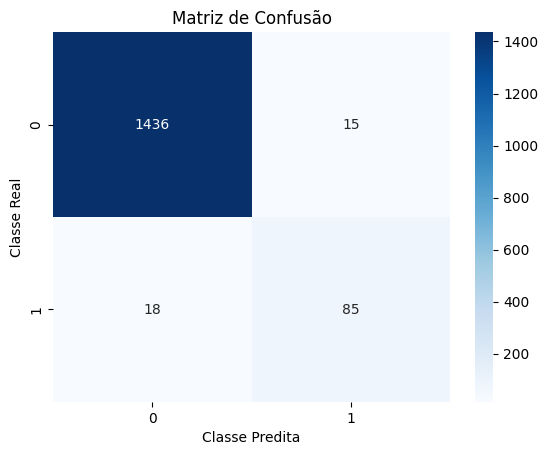

In [28]:
classes = [0,1]
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

***Executando o algoritmo de RandomForest na base obtida***

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(
    n_estimators=100,
    criterion=bestParams['criterion'],
    max_depth=bestParams['max_depth'],
    min_samples_leaf=bestParams['min_samples_leaf'],
    min_samples_split=bestParams['min_samples_split'],
    max_features=bestParams['max_features'],
    random_state=42
    )

In [31]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, max_features=0.4, random_state=42)

In [32]:
resultados = cross_val_predict(rfc, x_test, y_test, cv=10)

In [33]:
print(metrics.classification_report(y_test, resultados, digits=4))

              precision    recall  f1-score   support

           0     0.9883    0.9938    0.9911      1451
           1     0.9053    0.8350    0.8687       103

    accuracy                         0.9833      1554
   macro avg     0.9468    0.9144    0.9299      1554
weighted avg     0.9828    0.9833    0.9830      1554



In [34]:
cm = metrics.confusion_matrix(y_test, resultados)

In [35]:
cm

array([[1442,    9],
       [  17,   86]], dtype=int64)

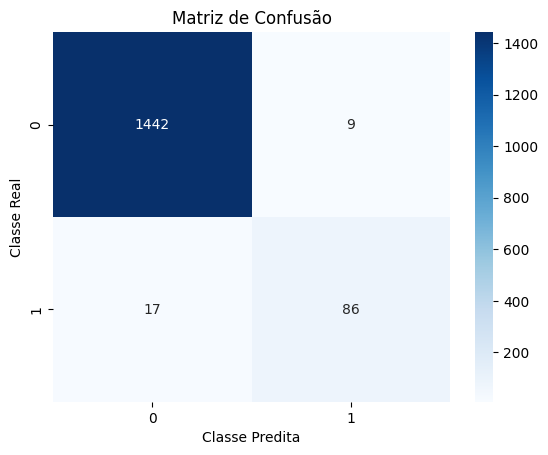

In [36]:
classes = [0,1]
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

***Executando o algoritmo de NeuralNetwork na base obtida***

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),
    activation='relu',
    alpha=0.0001,
    learning_rate='adaptive',
    solver='adam',
    random_state=42
)

In [39]:
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), learning_rate='adaptive',
              random_state=42)

In [40]:
resultados = cross_val_predict(mlp, x_test, y_test, cv=10)

In [41]:
print(metrics.classification_report(y_test, resultados, digits=4))

              precision    recall  f1-score   support

           0     0.9863    0.9938    0.9900      1451
           1     0.9022    0.8058    0.8513       103

    accuracy                         0.9813      1554
   macro avg     0.9442    0.8998    0.9207      1554
weighted avg     0.9807    0.9813    0.9808      1554



In [42]:
cm = metrics.confusion_matrix(y_test, resultados)

In [43]:
cm

array([[1442,    9],
       [  20,   83]], dtype=int64)

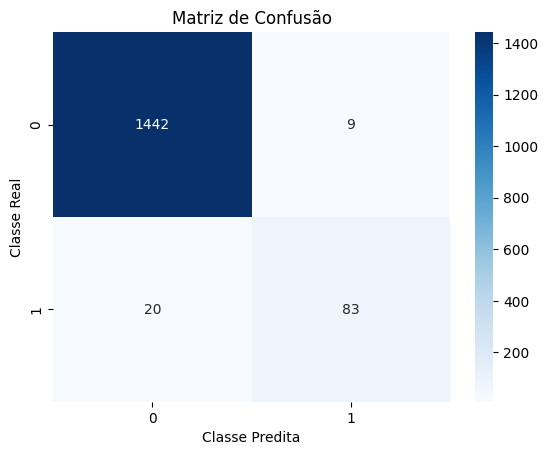

In [44]:
classes = [0,1]
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()